## **VISÃO COMPUTACIONAL - AULA 13**

**Objetivos da aula:**

*   apresentar o conceito de template matching
*   praticar com template matching em Python










**TEMPLATE MATCHING BÁSICO**

Considere a imagem mostrada abaixo:

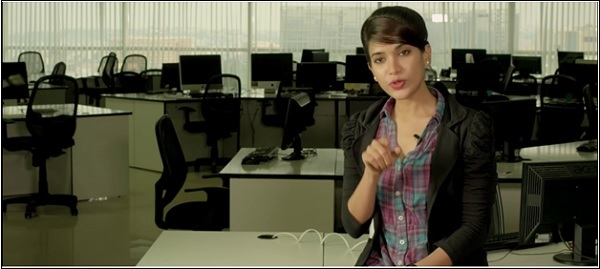

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
imagem = cv.imread('imagem.jpg')
cv2_imshow(imagem)

Nesta imagem, estamos interessados em encontrar a posição das mãos da mulher. Para isto, podemos definir um **template** para realizar a busca:

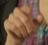

In [3]:
template = cv.imread('template.png')
cv2_imshow(template)

A técnica de Template Matching (Casamento de Padrões) consiste de alguns passos básicos:

*   Converta a imagem onde será realizada a busca para níveis de cinza.
*   Converta o template também para níveis de cinza.
*   Percorra o template sobre cada posição da imagem, calculando o nível de acurácia (proximidade) de cada posição.
*   Quando o nível de acurácia for maior que um limite de acurácia estabelecido, marque esta posição como posição de detecção (match position). 

Abaixo, temos um exemplo de aplicação de Template Matching com a OpenCV em Python:




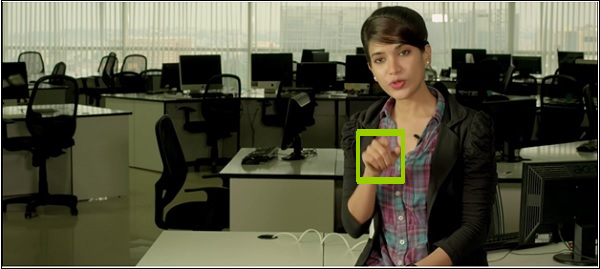

In [4]:
import cv2 as cv
import numpy as np

#abre a imagem onde a busca será realizada e a converte para níveis de cinbza
main_image = cv.imread('imagem.jpg')
gray_image = cv.cvtColor(main_image, cv.COLOR_BGR2GRAY)
#abre o template e o converte para níveis de cinza
template = cv.cvtColor(cv.imread('template.png'), cv.COLOR_BGR2GRAY)
#comprimento e largura do template
width,height=template.shape
#template matching, que devolve o nível de acurácia
match = cv.matchTemplate(gray_image, template, cv.TM_CCOEFF_NORMED)
#obtém as posições onde o template gerou níveis de acurácia maiores que um limiar
threshold = 0.8
position = np.where(match >= threshold)
#desenha os retângulos com as regiões encontradas
for point in zip(*position[::-1]): 
   cv.rectangle(main_image, point, (point[0] + width, point[1] + height), (0, 204, 153), 0)
cv2_imshow(main_image)

**EXERCÍCIO**

Qual é o limiar mínimo (threshold) para que o template matching funcione na imagem que foi utilizada para busca ?

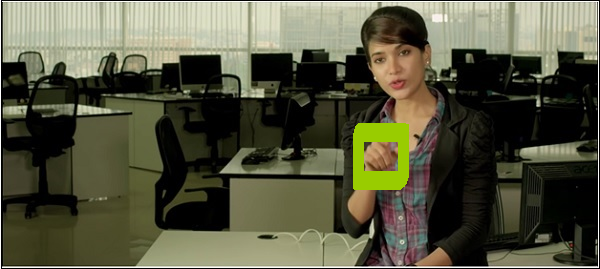

In [11]:
#abre a imagem onde a busca será realizada e a converte para níveis de cinbza
main_image = cv.imread('imagem.jpg')
gray_image = cv.cvtColor(main_image, cv.COLOR_BGR2GRAY)
#abre o template e o converte para níveis de cinza
template = cv.cvtColor(cv.imread('template.png'), cv.COLOR_BGR2GRAY)
#comprimento e largura do template
width,height=template.shape
#template matching, que devolve o nível de acurácia
match = cv.matchTemplate(gray_image, template, cv.TM_CCOEFF_NORMED)
#obtém as posições onde o template gerou níveis de acurácia maiores que um limiar
threshold = 0.56
position = np.where(match >= threshold)
#desenha os retângulos com as regiões encontradas
for point in zip(*position[::-1]): 
   cv.rectangle(main_image, point, (point[0] + width, point[1] + height), (0, 204, 153), 0)
cv2_imshow(main_image)

**EXERCÍCIO**

Refaça a mesma busca anterior, porém agora usando o seguinte template:

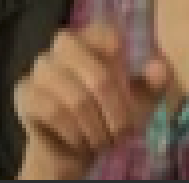

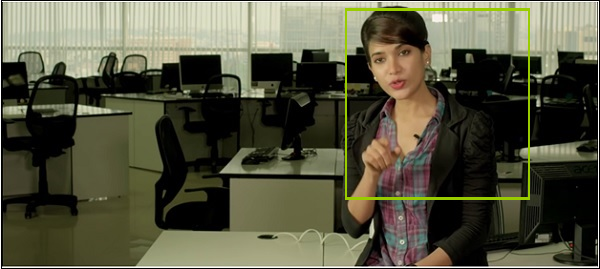

In [19]:
template = cv.imread('template_maior.png')
cv2_imshow(template)
#digite sua implementação aqui
#abre a imagem onde a busca será realizada e a converte para níveis de cinbza
main_image = cv.imread('imagem.jpg')
gray_image = cv.cvtColor(main_image, cv.COLOR_BGR2GRAY)
#abre o template e o converte para níveis de cinza
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
#comprimento e largura do template
width,height=template.shape
#template matching, que devolve o nível de acurácia
match = cv.matchTemplate(gray_image, template, cv.TM_CCOEFF_NORMED)
#obtém as posições onde o template gerou níveis de acurácia maiores que um limiar
threshold = 0.255
position = np.where(match >= threshold)
#desenha os retângulos com as regiões encontradas
for point in zip(*position[::-1]): 
   cv.rectangle(main_image, point, (point[0] + width, point[1] + height), (0, 204, 153), 0)
cv2_imshow(main_image)

**TEMPLATE MATCHING EM VÁRIAS ESCALAS**

Como observamos no exercício anterior, o template matching é sensível a escalas. Para tratar esta sensibilidade, vamos utilizar o seguinte código.

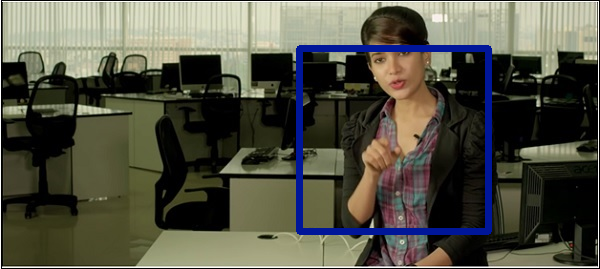

In [20]:
import imutils
import cv2 as cv
import numpy as np

template = cv.imread('template_maior.png')
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
template = cv.Canny(template, 10, 25)
(height, width) = template.shape[:2]
main_image = cv.imread('imagem.jpg')
gray_image = cv.cvtColor(main_image, cv.COLOR_BGR2GRAY)
temp_found = None
#TAMANHO ORIGINAL ATE 20%
for scale in np.linspace(0.2, 1.0, 20)[::-1]:

  #encontrar escala no valor que queremos
   resized_img = imutils.resize(gray_image, width = int(gray_image.shape[1] * scale))
   ratio = gray_image.shape[1] / float(resized_img.shape[1])
   if resized_img.shape[0] < height or resized_img.shape[1] < width:
      break

  # detectar arestas, serve para
   e = cv.Canny(resized_img, 10, 25)
   match = cv.matchTemplate(e, template, cv.TM_CCOEFF)
   (_, val_max, _, loc_max) = cv.minMaxLoc(match)
   if temp_found is None or val_max>temp_found[0]:
      temp_found = (val_max, loc_max, ratio)

(_, loc_max, r) = temp_found
(x_start, y_start) = (int(loc_max[0]), int(loc_max[1]))
(x_end, y_end) = (int((loc_max[0] + width)), int((loc_max[1] + height)))

cv.rectangle(main_image, (x_start, y_start), (x_end, y_end), (153, 22, 0), 5)
cv2_imshow(main_image)


**EXERCÍCIO**

Implemente um programa em OpeCV Python para encontrar todos os computadores da imagem abaixo:

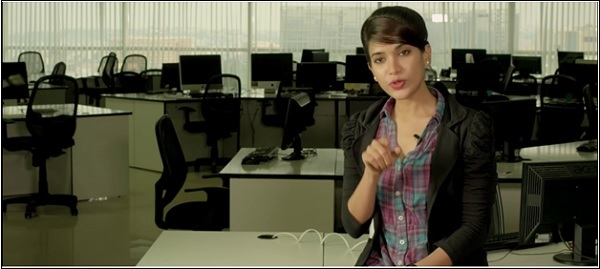

In [ ]:
imagem = cv.imread('imagem.jpg')
cv2_imshow(imagem)

In [ ]:
#implemente sua solução aqui

**EXERCÍCIO**

Utilize a técnica de template matching, conte quantas moedas existem na imagem abaixo:


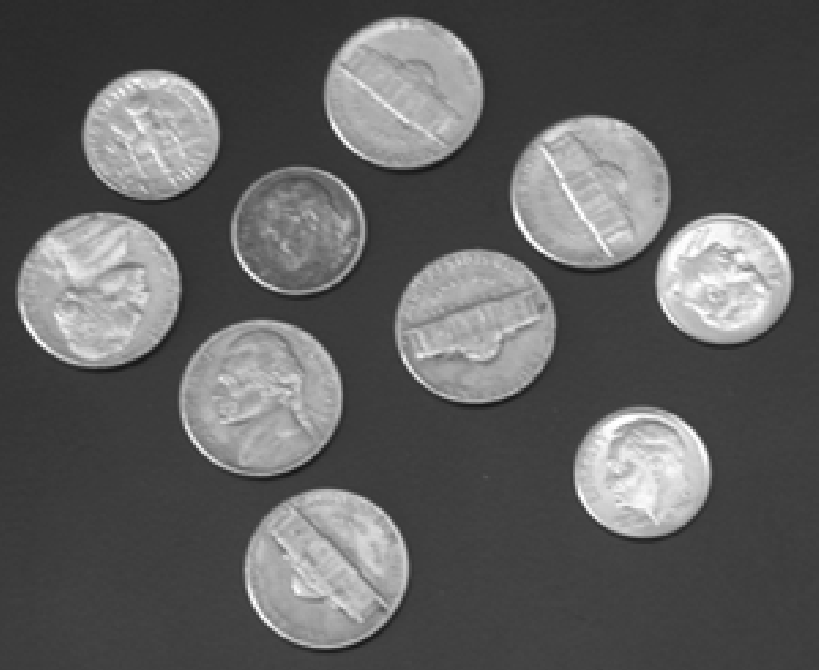

In [ ]:
imagem = cv.imread('moedas.png')
cv2_imshow(imagem)

#implemente sua solução aqui